<a href="https://colab.research.google.com/github/rbondili/Ecommerce_E2E_MLProject/blob/master/02_EDA_%26_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2) Exploration

As you can see in the description of the data, it contains 8 variables:

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
relative_path = '/content/drive/My Drive/Colab Notebooks/Customer Segmentation/ecommerce-data/' #put the name of you working directory here

df_dropna = pd.read_csv(relative_path + 'data_dropna.csv', encoding='latin', dtype={'CustomerID': str}) 
# df = pd.read_csv(relative_path + 'data.csv', encoding='latin', dtype={'CustomerID': str}) 
df_dropna.describe()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,Unnamed: 0,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,277729.795869,12.183273,3.474064
std,152507.474480,250.283037,69.764035
min,0.000000,-80995.000000,0.000000
25%,147762.750000,2.000000,1.250000
50%,283870.500000,5.000000,1.950000
75%,408888.250000,12.000000,3.750000
max,541908.000000,80995.000000,38970.000000


## 2.1) Identifying the Number of customers (/products/countries) and checking top 10 countries


In [ ]:
df_dropna.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_dropna[['CustomerID', 'StockCode', 'InvoiceNo']].describe()

,CustomerID,StockCode,InvoiceNo
count,401604,401604,401604
unique,4372,3684,22190
top,17841.0,85123A,576339
freq,7812,2065,542


In [ ]:
df_dropna.groupby(['Country'])['CustomerID'].count().sort_values(ascending=False).head(10)

Country
United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1471
Australia           1258
Name: CustomerID, dtype: int64

## 2.2) Products per transaction and displayed top 10


In [ ]:
df_dropna.shape

(401604, 9)

In [ ]:
df_dropna.groupby(['InvoiceNo'])['StockCode'].count().sort_values(ascending=False).head(10)

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
567656    421
567183    392
575607    377
571441    364
570488    353
Name: StockCode, dtype: int64

## 2.3) Transactions per country


In [ ]:
# transactions per country
transPerCountry = df_dropna.groupby(['Country'])['InvoiceNo'].nunique()
transPerCountry.sort_values(ascending=False)

Country
United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
USA                         7
Iceland                     7
Greece                      6
Canada                      6
Israel                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Ba

Ploting the transaction on the world map to check the distribution. 

In [ ]:
# choropleth map
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data = dict(type='choropleth',
locations = transPerCountry.index,
locationmode = 'country names', z = transPerCountry,
text = transPerCountry.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Number of transactions per country',
geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

## 2.4 )Cancelling orders :- Among observations, there are those with negative quantities. They correspond to cancelling orders (transactions).


In [ ]:
orders = df_dropna.InvoiceNo.unique()
n_orders = orders.shape[0]
n_cancelled_orders = pd.Series(orders).apply(lambda x: 'C' in x).sum()
print('Number of cancelled transactions: {}/{} ({:0.2f}%)'.format(n_cancelled_orders, n_orders,\
n_cancelled_orders/n_orders*100))

Number of cancelled transactions: 3654/22190 (16.47%)


In [ ]:
df_dropna.loc[df_dropna.InvoiceNo.apply(lambda x: 'C' in x)].count()

Unnamed: 0     8872
InvoiceNo      8872
StockCode      8872
Description    8872
Quantity       8872
InvoiceDate    8872
UnitPrice      8872
CustomerID     8872
Country        8872
dtype: int64

Cancelling orders occur due to customer wishes or product discounts:

In [ ]:
df_dropna.loc[df_dropna.InvoiceNo.apply(lambda x: 'C' in x)].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


When there is a cancelling order, it's often the case that part of the command has been canceled. There is a counterpart which is a another purchase order with the same CustomerID, Description and UnitPrice, but different InvoiceID and date.

Cancellations without a counterpart problaly due to the fact that the purchase commands happen before the beginning date of the data set, or they are discounts.

We will create a new variable `QuantityCanceled` in the dataframe that indicate if part of the command has been canceled. 

We will also check the two cases:

* a cancel order exists without counterpart
* there's at least one counterpart 

The index of the corresponding cancel orders are respectively kept in the `doubtfull_entry` and `entry_to_remove` lists.

***Note***: Just understand and run this code, but note that it can take some time, like 10-15 minutes.

In [ ]:
idx = pd.IndexSlice
df_customer_stockcode = df_dropna.set_index(['CustomerID', 'StockCode'], append=True)

# Note: we don't consider discount entries
# doubtfull_entry: cancel entries with no counterpart
# entry_to_remove: cancel entries with counterparts and there is at least one entry with higher quantity!

df_cleaned = df_dropna.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_dropna.iterrows():

    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df_customer_stockcode.loc[idx[:, col['CustomerID'], col['StockCode']], :]
    df_test = df_test[(df_test['InvoiceDate'] < col['InvoiceDate']) & (df_test['Quantity']   > 0)]
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # Cancelation WITH only one counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0][0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0, ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind[0], 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break


Evaluate lengths of `entry_to_remove` and `doubtfull_entry`. Delete corresponding rows from `df_cleaned`

In [ ]:
print(len(entry_to_remove), len(doubtfull_entry))
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

7521 1226


In [ ]:
df_cleaned.shape

(392857, 10)

In [ ]:
df_cleaned.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


## 2.5) StockCode with letters

As we have seen, there are stockCode values which aren't numbers, like 'D' for discount. 
Use <b>regular expressions</b> to catch all of the existing codes in order to investigate what other values we have.
Investigate dependence between these codes and `Description` feature.

We can see how to use Regular expressions (or RegExp) here : <a href ='https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_Expressions'>Tutorial Regexp</a>.


In [ ]:
pattern = "^[a-zA-Z]+"
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains(pattern, regex=True)]['StockCode'].tolist()

In [ ]:
codes = list(set(list_special_codes))
codes

['D', 'BANK CHARGES', 'POST', 'PADS', 'DOT', 'M', 'C2']

In [ ]:
desc_list = []
for code in codes: 
  desc = list(set(df_cleaned[df_cleaned['StockCode'] == code]['Description'].tolist()))
  desc_list.extend(desc)

In [ ]:
description = {}
for code, desc in zip(codes, desc_list):
  description[code] = desc
description

{'BANK CHARGES': 'Bank Charges',
 'C2': 'CARRIAGE',
 'D': 'Discount',
 'DOT': 'DOTCOM POSTAGE',
 'M': 'Manual',
 'PADS': 'PADS TO MATCH ALL CUSHIONS',
 'POST': 'POSTAGE'}

## 2.6) Basket prices :- create a feature `TotalPrice` for the dataframe, which is the total price for each line

In [ ]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [ ]:
df_cleaned.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


Each entry of the dataframe indicates prizes for a single kind of product, so an order are split on several lines. We collect all the commands during a single order (same InvoiceNo) to recover the total order prize. 


In [ ]:
# sum the commands for each order
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

# command date
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# keep only positive purchases
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]


,CustomerID,InvoiceNo,Basket Price,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00.000000000
1,12347.0,537626,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000


Purchases can be divided according to total prizes, run the code:

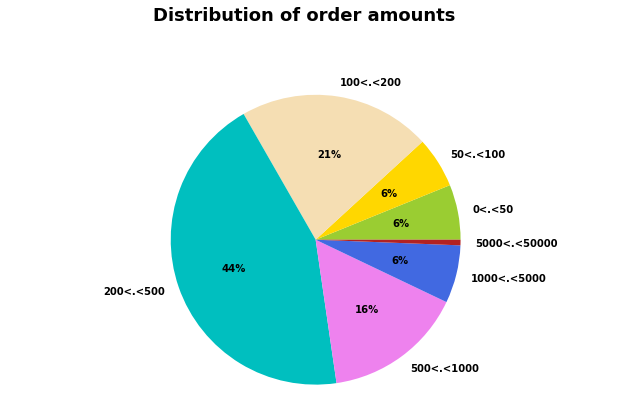

In [ ]:
import matplotlib.pyplot as plt

# Define price ranges
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

# Distribution of order amounts    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

## 2.7) Save preprocessed data to the file `data_cleaned.csv` and `basket_price.csv`

In [ ]:
df_cleaned.to_csv(relative_path + 'data_cleaned.csv')
basket_price.to_csv(relative_path + 'basket_price.csv')